In [42]:
#importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#fetching and reading the csv dataset
dataFrame = pd.read_csv("WaterData.csv")
dataFrame.head()

,Date,Total Solids,SS,BOD5,NH3,Org-N,P-TOT,SO4,TKN,PRCP_NOOA
0,01-01-2001,984.0,170.0,173.0,15.93,14.0,4.58,72,29.97,0.0
1,02-01-2001,924.0,122.0,174.0,15.52,14.4,4.52,72,29.96,0.0
2,03-01-2001,1135.0,300.0,303.0,14.19,21.9,6.06,,36.11,0.0
3,04-01-2001,1013.0,192.0,228.0,15.43,19.4,5.33,,34.83,0.0
4,05-01-2001,1088.0,226.0,210.0,14.77,19.3,5.41,,34.06,0.0


In [3]:
#shape of the datafrme
dataFrame.shape

(6570, 10)

In [4]:
#missing values in the dataframe
dataFrame.isna().sum()

Date              0
Total Solids      6
SS                9
BOD5            185
NH3               8
Org-N             8
P-TOT             6
SO4               0
TKN               6
PRCP_NOOA         0
dtype: int64

In [5]:
#we will select the best features to pridict the good result 
#so we are droping the two attributes coloumns Date and SO4
dataFrame.drop(['Date','SO4'],axis = 1,inplace=True)

In [6]:
#handling the missing values in the dataframe
for i in dataFrame.columns:
    if dataFrame[i].isna().sum():
        mean = dataFrame[i].mean()
        dataFrame[i].fillna(value=mean,inplace=True)

In [7]:
# #now checking the missing values in the dataframea
dataFrame.isna().sum()

Total Solids    0
SS              0
BOD5            0
NH3             0
Org-N           0
P-TOT           0
TKN             0
PRCP_NOOA       0
dtype: int64

In [8]:
#check the datatypes we have on our dataset 
dataFrame.dtypes

Total Solids    float64
SS              float64
BOD5            float64
NH3             float64
Org-N           float64
P-TOT           float64
TKN             float64
PRCP_NOOA       float64
dtype: object

In [9]:
# Descriptive statistics for each column
dataFrame.describe()

,Total Solids,SS,BOD5,NH3,Org-N,P-TOT,TKN,PRCP_NOOA
count,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000,6570.000000
mean,956.752438,183.932632,154.212686,15.027108,11.216573,4.183650,26.285948,0.106889
std,220.507236,133.710907,69.780271,5.138263,4.881124,1.617899,8.285530,0.320450
min,306.000000,12.000000,18.000000,0.760000,0.000000,0.400000,0.400000,0.000000
25%,846.000000,118.000000,118.000000,11.640000,8.800000,3.300000,21.900000,0.000000
50%,936.000000,167.000000,151.000000,15.470000,11.100000,4.300000,27.400000,0.000000
75%,1041.000000,216.000000,184.000000,18.700000,13.200000,5.050000,31.600000,0.040000
max,3759.000000,3170.000000,2663.000000,33.060000,110.700000,34.800000,142.300000,6.860000


<Figure size 1280x960 with 0 Axes>

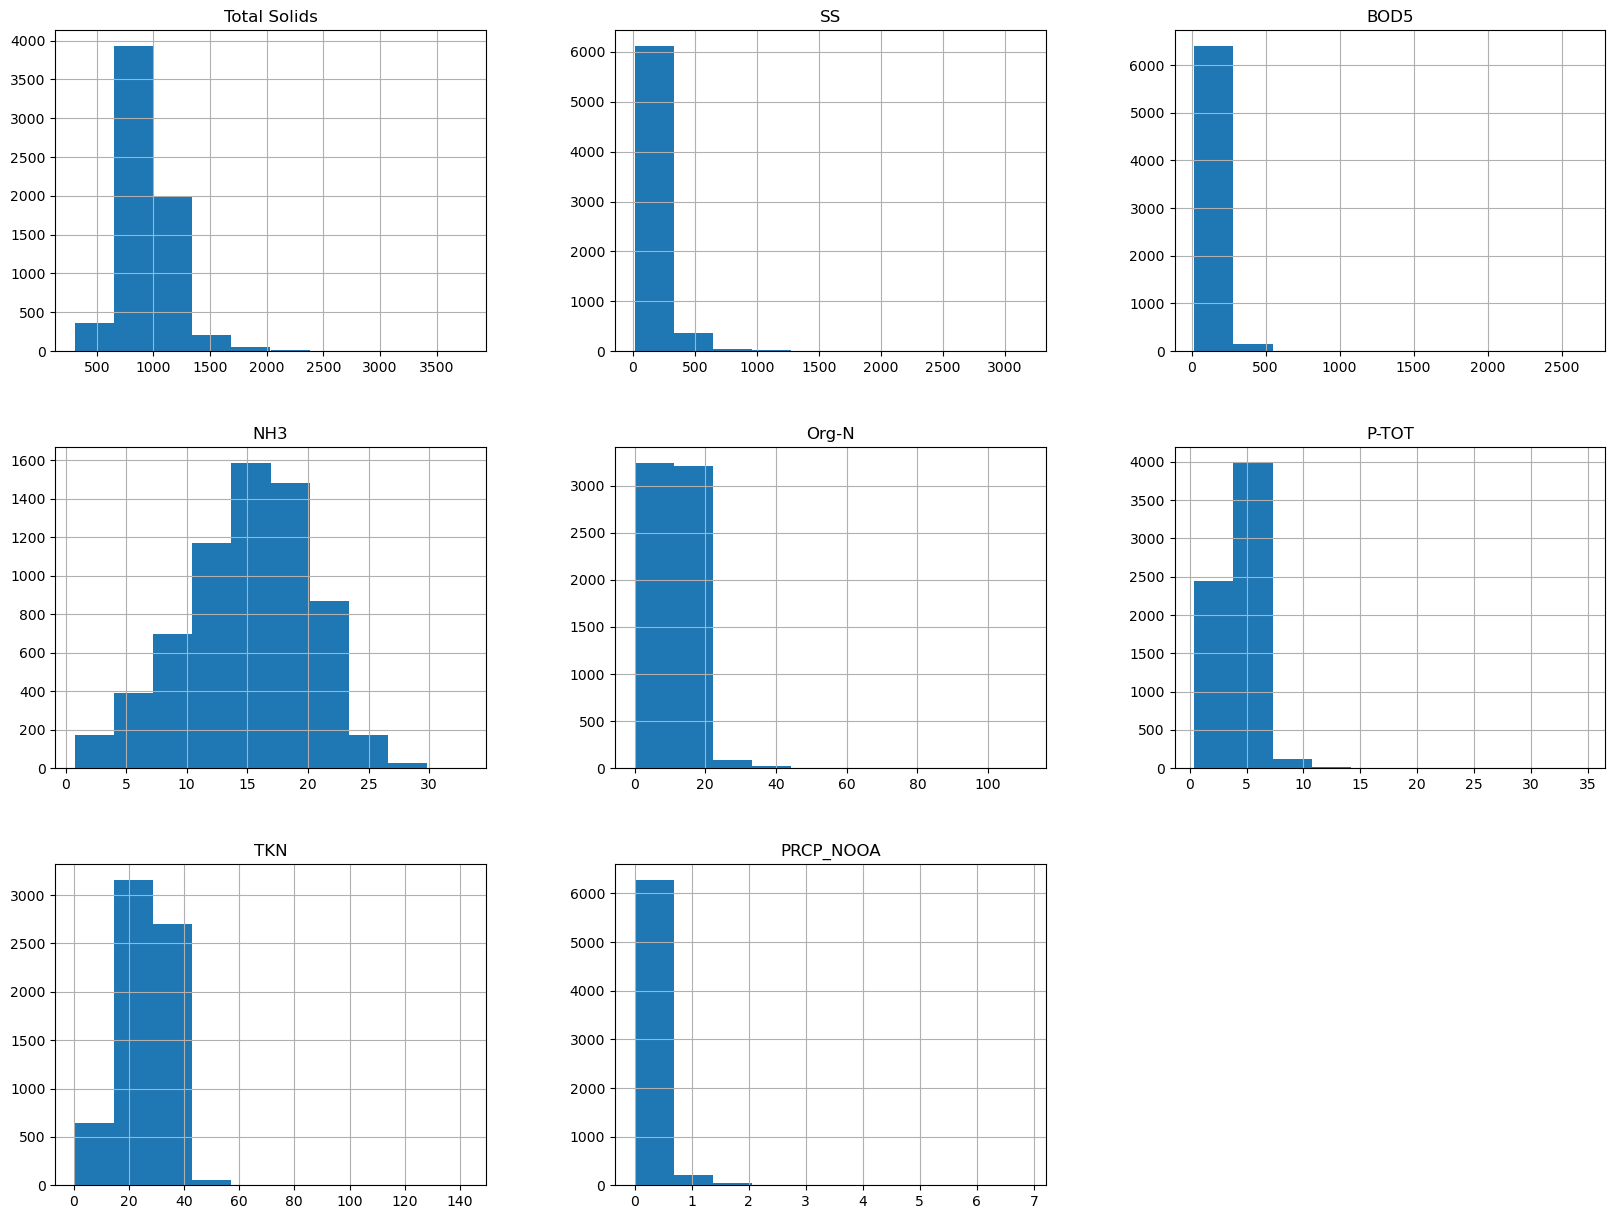

In [10]:
#feature plots for the water characterstics
plt.figure(dpi=200)
dataFrame.hist(figsize = (20,15))
plt.show()

# Exploratory Data Analysis

<AxesSubplot:>

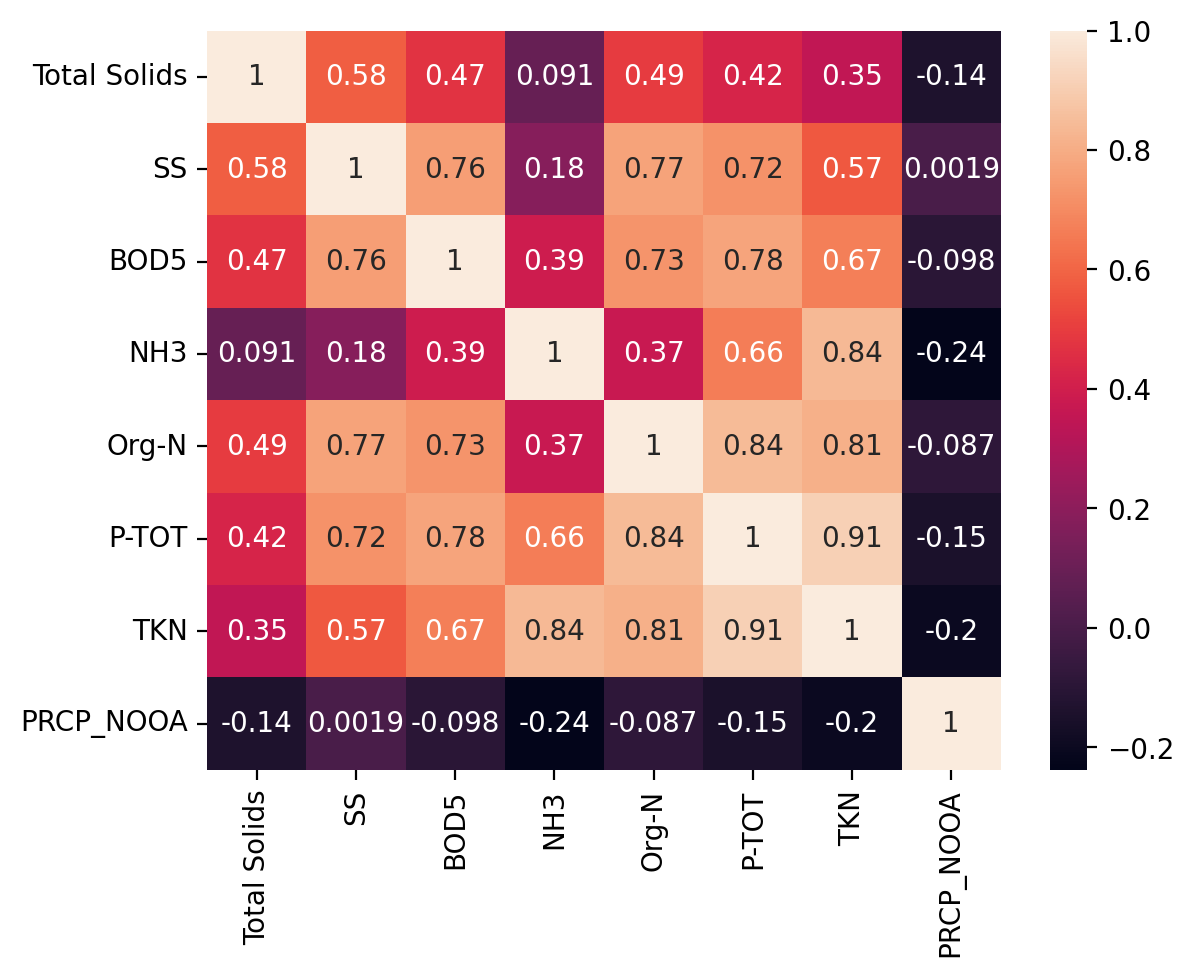

In [12]:
plt.figure(dpi=200)
sns.heatmap(dataFrame.corr(), annot = True)

In [15]:
dataFrame.columns # obtaining the name of the columns

Index(['Total Solids', 'SS', 'BOD5', 'NH3', 'Org-N', 'P-TOT', 'TKN',
       'PRCP_NOOA'],
      dtype='object')

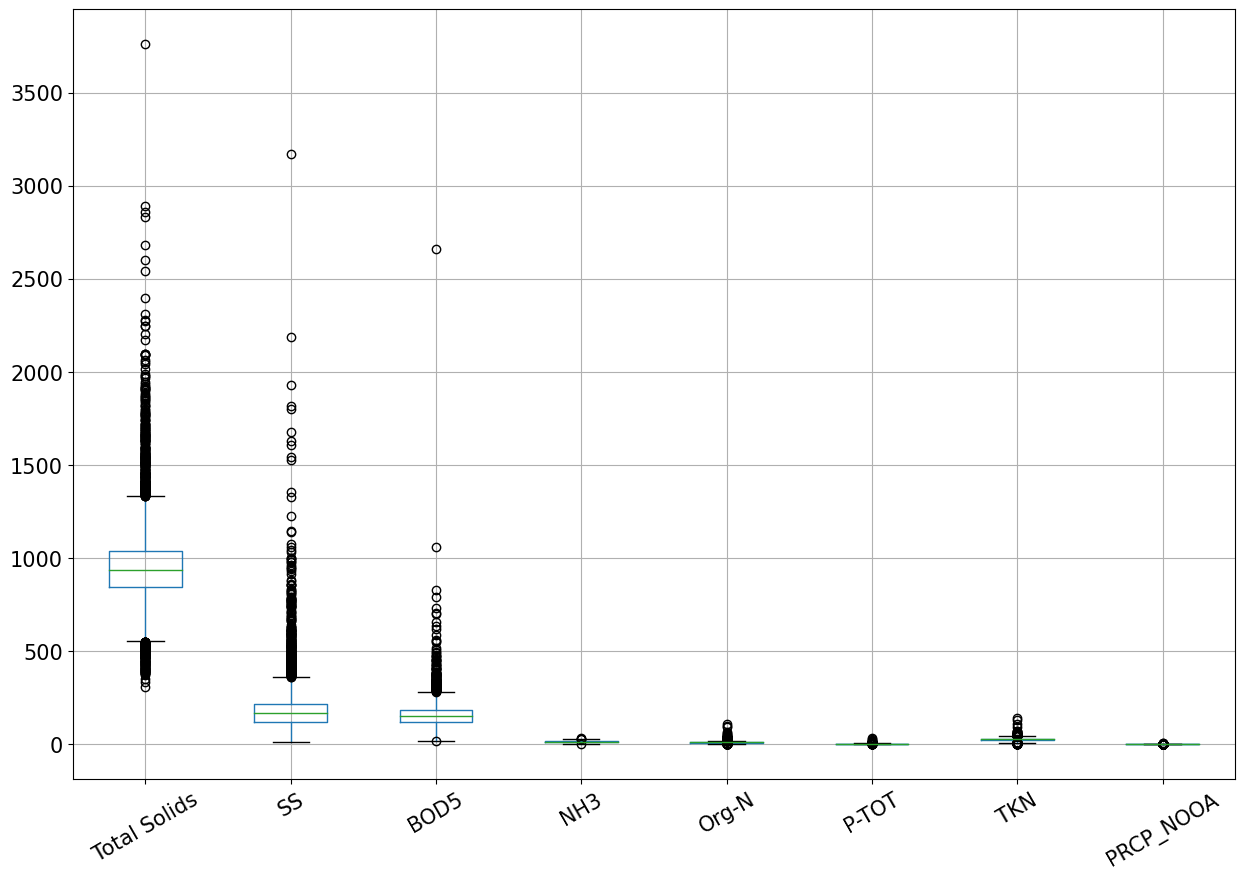

In [16]:
#box plot of the water characterstics
dataFrame.boxplot(figsize = (15,10), fontsize = 15, rot = 30)
plt.show()

# 1. Predict Target "Total Solids"

In [17]:
dataFrame.head()

,Total Solids,SS,BOD5,NH3,Org-N,P-TOT,TKN,PRCP_NOOA
0,984.0,170.0,173.0,15.93,14.0,4.58,29.97,0.0
1,924.0,122.0,174.0,15.52,14.4,4.52,29.96,0.0
2,1135.0,300.0,303.0,14.19,21.9,6.06,36.11,0.0
3,1013.0,192.0,228.0,15.43,19.4,5.33,34.83,0.0
4,1088.0,226.0,210.0,14.77,19.3,5.41,34.06,0.0


In [18]:
#formulating the values to different variables to x1 and y1
#where x1 related to have feature values and y1 have target values
#droping the target variable Total Solids from the x1 variable
x1 = dataFrame.drop('Total Solids',axis=1)
y1 = dataFrame['Total Solids']

In [19]:
#splitted the dataset into 80:20 ratio where 80% dataset is splitted to training 
#and 20 % dataset is splitted to test dataset
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [20]:
print('Training Features Shape:', x_train1.shape)
print('Training Labels Shape:', y_train1.shape)
print('Testing Features Shape:', x_test1.shape)
print('Testing Labels Shape:', y_test1.shape)

Training Features Shape: (5256, 7)
Training Labels Shape: (5256,)
Testing Features Shape: (1314, 7)
Testing Labels Shape: (1314,)


In [59]:
#classify the model with 1000 no. of iteration for better performace of the model 
regressor1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#train the model with Random Forest Regression algorithm
regressor1.fit(x_train1, y_train1)

In [61]:
#liner regression model
linear_regress1 = LinearRegression()
#train the model with Linear Regression algorithm
linear_regress1.fit(x_train1,y_train1)

LinearRegression()

In [92]:
#apply the model to pridict the values from the test attributes values
y_predf1 = regressor1.predict(x_test1)
y_predr1 = linear_regress1.predict(x_test1)

In [120]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df1=pd.DataFrame({'Actual':y_test1, 'Predicted':y_predf1})
df1.head()

Random Forest Regression 


,Actual,Predicted
5364,858.0,968.463
5586,814.0,918.150
2623,1007.0,992.908
5939,1120.0,990.308
1360,803.0,940.642


In [122]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df1=pd.DataFrame({'Actual':y_test1, 'Predicted':y_predr1})
df1.head()

Linear Regression Results


,Actual,Predicted
5364,858.0,957.454262
5586,814.0,877.276173
2623,1007.0,849.358852
5939,1120.0,1072.262368
1360,803.0,962.425207


In [110]:
#r2 sqaure error
print("Random Forest r2 score:",metrics.r2_score(y_test1,y_predf1))
print("Linear Regression r2 score:",metrics.r2_score(y_test1,y_predr1))

Random Forest r2 score: 0.36067109229114513
Linear Regression r2 score: 0.33228795533218625


In [113]:
# Calculate the absolute errors
errorsf1 = abs(y_predf1 - y_test1)
errorsr1 = abs(y_predr1 - y_test1)

# Calculate mean absolute percentage error (MAPE)
mapef1 = 100 * (errorsf1 / y_test1)
maper1 = 100 * (errorsr1 / y_test1)

# Calculate and display accuracy
accuracyf1 = 100 - np.mean(mapef1)
accuracyr1 = 100 - np.mean(maper1)
print('Random Forest Accuracy:', round(accuracyf1, 2), '%.')
print('Linear Regression Accuracy:', round(accuracyr1, 2), '%.')

Random Forest Accuracy: 87.99 %.
Linear Regression Accuracy: 87.35 %.


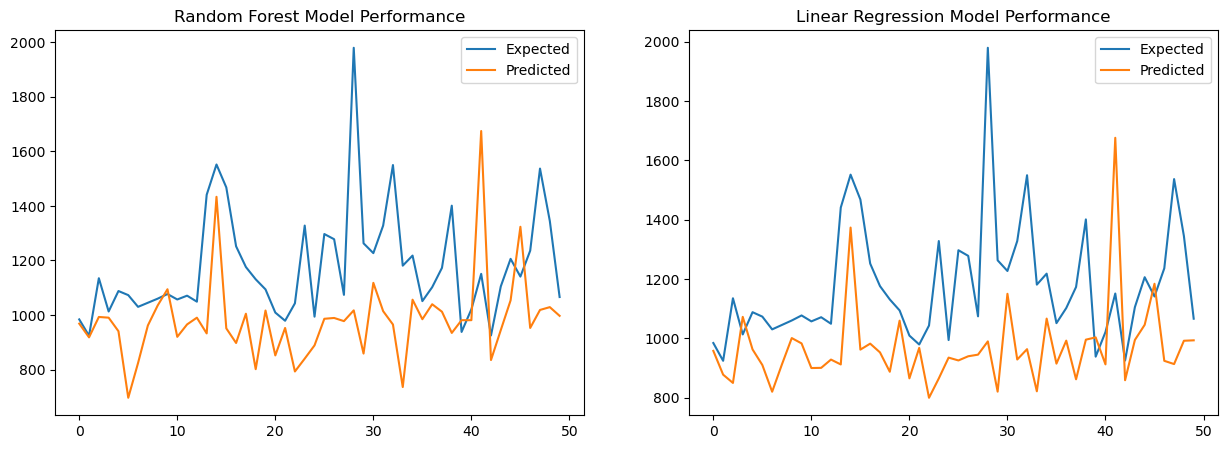

In [108]:
# plot expected vs predicted
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.title('Random Forest Model Performance')
plt.plot(y1[:50], label='Expected')
plt.plot(y_predf1[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.title('Linear Regression Model Performance')
plt.plot(y1[:50], label='Expected')
plt.plot(y_predr1[:50], label='Predicted')
plt.legend()
plt.show()

# 2. Predict Target "SS"

In [114]:
#formulating the values to different variables to x2 and y2
#where x2 related to have feature values and y2 have target values
#droping the target variable SS from the x2 variable
x2 = dataFrame.drop('SS',axis=1)
y2 = dataFrame['SS']

In [115]:
#splitted the dataset into 80:20 ratio where 80% dataset is splitted to training 
#and 20 % dataset is splitted to test dataset
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [116]:
#classify the model with 1000 no. of iteration for better performace of the model 
regressor2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor2.fit(x_train2, y_train2)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [117]:
#liner regression model
linear_regress2 = LinearRegression()
#train the model with Linear Regression algorithm
linear_regress2.fit(x_train2,y_train2)

LinearRegression()

In [119]:
#apply the model to pridict the values from the test attributes values
y_predf2 = regressor2.predict(x_test2)
y_predr2 = linear_regress2.predict(x_test2)

In [140]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df2=pd.DataFrame({'Actual':y_test2, 'Predicted':y_predf2})
df2.head()

Random Forest Regression Results


,Actual,Predicted
5764,188.0,165.724
6024,362.0,349.207
3515,46.0,83.117
888,164.0,196.159
5626,53.0,69.832


In [141]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df2=pd.DataFrame({'Actual':y_test2, 'Predicted':y_predr2})
df2.head()

Linear Regression Results


,Actual,Predicted
5764,188.0,178.620421
6024,362.0,326.412924
3515,46.0,54.253386
888,164.0,217.045110
5626,53.0,36.022393


In [126]:
#r2 sqaure error
print("Random Forest r2 score:",metrics.r2_score(y_test2,y_predf2))
print("Linear Regression r2 score:",metrics.r2_score(y_test2,y_predr2))

Random Forest r2 score: 0.8521893226883084
Linear Regression r2 score: 0.7417652643805468


In [128]:
# Calculate the absolute errors
errorsf2 = abs(y_predf2 - y_test2)
errorsr2 = abs(y_predr2 - y_test2)

# Calculate mean absolute percentage error (MAPE)
mapef2 = 100 * (errorsf2 / y_test2)
maper2 = 100 * (errorsr2 / y_test2)

# Calculate and display accuracy
accuracyf2 = 100 - np.mean(mapef2)
accuracyr2 = 100 - np.mean(maper2)
print('Random Forest Accuracy:', round(accuracyf2, 2), '%.')
print('Linear Regression Accuracy:', round(accuracyr2, 2), '%.')

Random Forest Accuracy: 79.56 %.
Linear Regression Accuracy: 73.84 %.


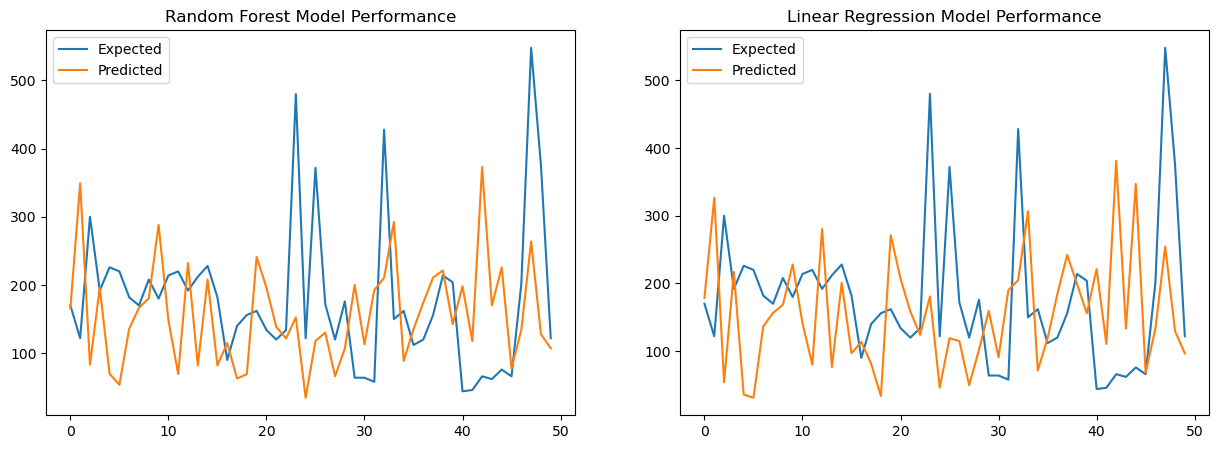

In [129]:
# plot expected vs predicted
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.title('Random Forest Model Performance')
plt.plot(y2[:50], label='Expected')
plt.plot(y_predf2[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.title('Linear Regression Model Performance')
plt.plot(y2[:50], label='Expected')
plt.plot(y_predr2[:50], label='Predicted')
plt.legend()
plt.show()

# 3. Predict Target "BOD5"

In [130]:
#formulating the values to different variables to x3 and y3
#where x3 related to have feature values and y3 have target values
#droping the target variable BOD5 from the x1 variable
x3 = dataFrame.drop('BOD5',axis=1)
y3 = dataFrame['BOD5']

In [131]:
#splitted the dataset into 80:20 ratio where 80% dataset is splitted to training 
#and 20 % dataset is splitted to test dataset
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=0)

In [132]:
#classify the model with 1000 no. of iteration for better performace of the model 
regressor3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor3.fit(x_train3, y_train3)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [133]:
#liner regression model
linear_regress3 = LinearRegression()
#train the model with Linear Regression algorithm
linear_regress3.fit(x_train3,y_train3)

LinearRegression()

In [134]:
#apply the model to pridict the values from the test attributes values
y_predf3 = regressor3.predict(x_test3)
y_predr3 = linear_regress3.predict(x_test3)

In [135]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df1=pd.DataFrame({'Actual':y_test3, 'Predicted':y_predf3})
df1.head()

Random Forest Regression Results


,Actual,Predicted
5764,164.0,159.289743
6024,201.0,267.145000
3515,87.0,78.736638
888,174.0,155.647851
5626,58.0,72.368183


In [136]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df1=pd.DataFrame({'Actual':y_test3, 'Predicted':y_predr3})
df1.head()

Linear Regression Results


,Actual,Predicted
5764,164.0,158.406499
6024,201.0,270.183422
3515,87.0,82.007358
888,174.0,154.541847
5626,58.0,72.085041


In [137]:
#r2 sqaure error
print("Random Forest r2 score:",metrics.r2_score(y_test3,y_predf3))
print("Linear Regression r2 score:",metrics.r2_score(y_test3,y_predr3))

Random Forest r2 score: 0.7330032227797459
Linear Regression r2 score: 0.6995638517181073


In [138]:
# Calculate the absolute errors
errorsf3 = abs(y_predf3 - y_test3)
errorsr3 = abs(y_predr3 - y_test3)

# Calculate mean absolute percentage error (MAPE)
mapef3 = 100 * (errorsf3 / y_test3)
maper3 = 100 * (errorsr3 / y_test3)

# Calculate and display accuracy
accuracyf3 = 100 - np.mean(mapef3)
accuracyr3 = 100 - np.mean(maper3)
print('Random Forest Accuracy:', round(accuracyf3, 2), '%.')
print('Linear Regression Accuracy:', round(accuracyr3, 2), '%.')

Random Forest Accuracy: 83.54 %.
Linear Regression Accuracy: 83.49 %.


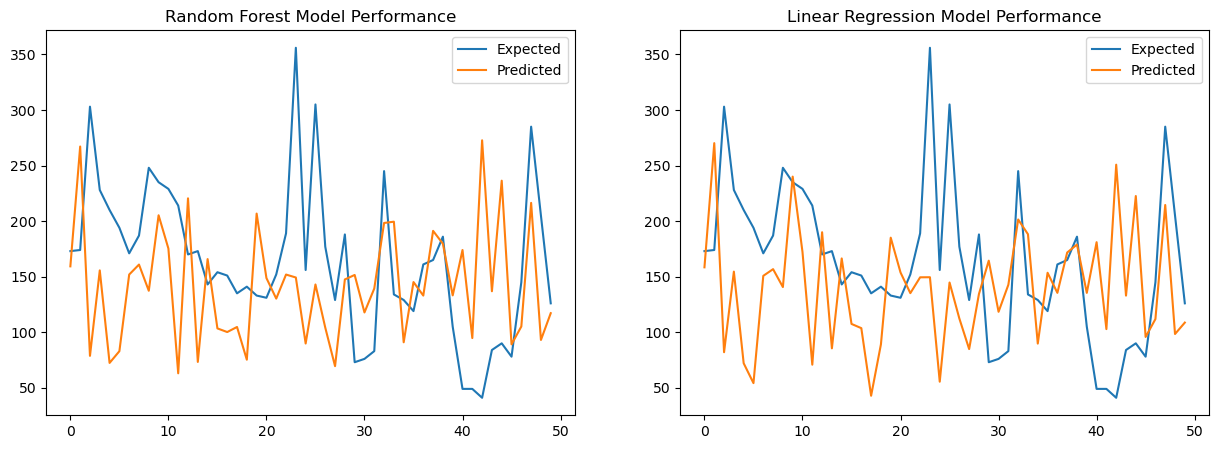

In [139]:
# plot expected vs predicted
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.title('Random Forest Model Performance')
plt.plot(y3[:50], label='Expected')
plt.plot(y_predf3[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.title('Linear Regression Model Performance')
plt.plot(y3[:50], label='Expected')
plt.plot(y_predr3[:50], label='Predicted')
plt.legend()
plt.show()

# 4. Predict Target "NH3"

In [143]:
#formulating the values to different variables to x4 and y4
#where x4 related to have feature values and y4 have target values
#droping the target variable Total Solids from the x4 variable
x4 = dataFrame.drop('NH3',axis=1)
y4 = dataFrame['NH3']

In [144]:
#splitted the dataset into 80:20 ratio where 80% dataset is splitted to training 
#and 20 % dataset is splitted to test dataset
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.2, random_state=0)

In [145]:
#classify the model with 1000 no. of iteration for better performace of the model 
regressor4 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor4.fit(x_train4, y_train4)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [146]:
#liner regression model
linear_regress4 = LinearRegression()
#train the model with Linear Regression algorithm
linear_regress4.fit(x_train4,y_train4)

LinearRegression()

In [147]:
#apply the model to pridict the values from the test attributes values
y_predf4 = regressor4.predict(x_test4)
y_predr4 = linear_regress4.predict(x_test4)

In [148]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df4=pd.DataFrame({'Actual':y_test4, 'Predicted':y_predf4})
df4.head()

Random Forest Regression Results


,Actual,Predicted
5764,17.73,17.58789
6024,24.79,25.11604
3515,10.18,10.22293
888,14.62,14.61489
5626,7.36,7.43429


In [150]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df4=pd.DataFrame({'Actual':y_test4, 'Predicted':y_predr4})
df4.head()

Linear Regression Results


,Actual,Predicted
5764,17.73,17.762743
6024,24.79,26.069849
3515,10.18,10.274380
888,14.62,14.727482
5626,7.36,7.503438


In [153]:
#r2 sqaure error
print("Random Forest r2 score:",metrics.r2_score(y_test4,y_predf4))
print("Linear Regression r2 score:",metrics.r2_score(y_test4,y_predr4))

Random Forest r2 score: 0.9827598784361468
Linear Regression r2 score: 0.9457841150237905


In [156]:
# Calculate the absolute errors
errorsf4 = abs(y_predf4 - y_test4)
errorsr4 = abs(y_predr4 - y_test4)

# Calculate mean absolute percentage error (MAPE)
mapef4 = 100 * (errorsf4 / y_test4)
maper4 = 100 * (errorsr4 / y_test4)

# Calculate and display accuracy
accuracyf4 = 100 - np.mean(mapef4)
accuracyr4 = 100 - np.mean(maper4)
print('Random Forest Accuracy:', round(accuracyf4, 2), '%.')
print('Linear Regression Accuracy:', round(accuracyr4, 2), '%.')

Random Forest Accuracy: 98.05 %.
Linear Regression Accuracy: 98.24 %.


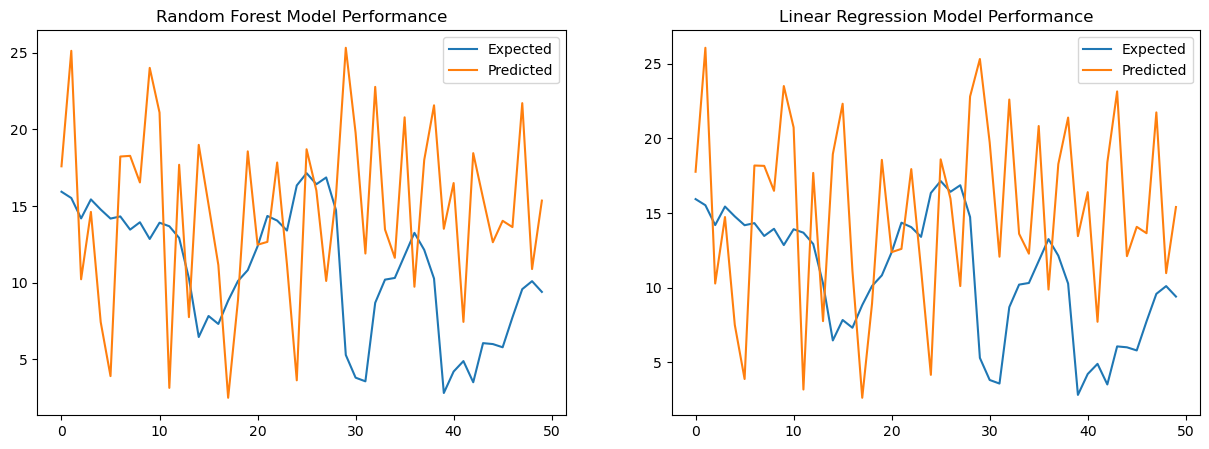

In [157]:
# plot expected vs predicted
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.title('Random Forest Model Performance')
plt.plot(y4[:50], label='Expected')
plt.plot(y_predf4[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.title('Linear Regression Model Performance')
plt.plot(y4[:50], label='Expected')
plt.plot(y_predr4[:50], label='Predicted')
plt.legend()
plt.show()

# 5. Predict Target "Org-N"

In [158]:
#formulating the values to different variables to x5 and y5
#where x5 related to have feature values and y5 have target values
#droping the target variable Org-N from the x5 variable
x5 = dataFrame.drop('Org-N',axis=1)
y5 = dataFrame['Org-N']

In [159]:
#splitted the dataset into 80:20 ratio where 80% dataset is splitted to training 
#and 20 % dataset is splitted to test dataset
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size=0.2, random_state=0)

In [160]:
#classify the model with 1000 no. of iteration for better performace of the model 
regressor5 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor5.fit(x_train5, y_train5)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [161]:
#liner regression model
linear_regress5 = LinearRegression()
#train the model with Linear Regression algorithm
linear_regress5.fit(x_train5,y_train5)

LinearRegression()

In [163]:
#apply the model to pridict the values from the test attributes values
y_predf5 = regressor5.predict(x_test5)
y_predr5 = linear_regress5.predict(x_test5)

In [164]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df5=pd.DataFrame({'Actual':y_test5, 'Predicted':y_predf5})
df5.head()

Random Forest Regression Results


,Actual,Predicted
5764,14.3,14.33935
6024,18.6,20.02800
3515,6.4,6.28313
888,13.9,13.97924
5626,5.6,5.45766


In [165]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df5=pd.DataFrame({'Actual':y_test5, 'Predicted':y_predr5})
df5.head()

Linear Regression Results


,Actual,Predicted
5764,14.3,14.186750
6024,18.6,20.018325
3515,6.4,6.407699
888,13.9,13.786682
5626,5.6,5.626578


In [167]:
#r2 sqaure error
print("Random Forest r2 score:",metrics.r2_score(y_test5,y_predf5))
print("Linear Regression r2 score:",metrics.r2_score(y_test5,y_predr5))

Random Forest r2 score: 0.9225712027941019
Linear Regression r2 score: 0.927701915675094


In [171]:
# Calculate the absolute errors
errorsf5 = abs(y_predf5 - y_test5)
errorsr5 = abs(y_predr5- y_test5)

# Calculate mean absolute percentage error (MAPE)
mapef5 = 100 * (errorsf5 / y_test5)
maper5= 100 * (errorsr5 / y_test5)
mapef5.replace([np.inf,-np.inf],np.nan,inplace=True)
mapef5.dropna(inplace=True)

maper5.replace([np.inf,-np.inf],np.nan,inplace=True)
maper5.dropna(inplace=True)
# Calculate and display accuracy
accuracyf5 = 100 - np.mean(mapef5)
accuracyr5 = 100 - np.mean(maper5)
print('Random Forest Accuracy:', round(accuracyf5, 2), '%.')
print('Linear Regression Accuracy:', round(accuracyr5, 2), '%.')

Random Forest Accuracy: 90.34 %.
Linear Regression Accuracy: 92.77 %.


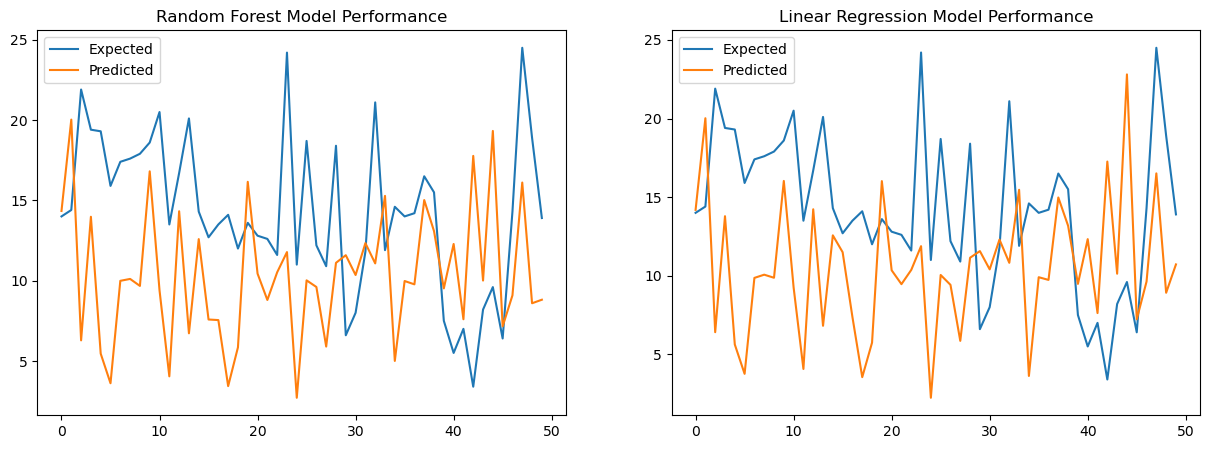

In [172]:
# plot expected vs predicted
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.title('Random Forest Model Performance')
plt.plot(y5[:50], label='Expected')
plt.plot(y_predf5[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.title('Linear Regression Model Performance')
plt.plot(y5[:50], label='Expected')
plt.plot(y_predr5[:50], label='Predicted')
plt.legend()
plt.show()

# 6. Predict Target "P-TOT"

In [173]:
#formulating the values to different variables to x6 and y6
#where x6 related to have feature values and y6 have target values
#droping the target variable P-TOT from the x6 variable
x6 = dataFrame.drop('P-TOT',axis=1)
y6 = dataFrame['P-TOT']

In [174]:
#splitted the dataset into 80:20 ratio where 80% dataset is splitted to training 
#and 20 % dataset is splitted to test dataset
x_train6, x_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size=0.2, random_state=0)

In [175]:
#classify the model with 1000 no. of iteration for better performace of the model 
regressor6 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor6.fit(x_train6, y_train6)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [177]:
#liner regression model
linear_regress6 = LinearRegression()
#train the model with Linear Regression algorithm
linear_regress6.fit(x_train6,y_train6)

LinearRegression()

In [178]:
#apply the model to pridict the values from the test attributes values
y_predf6 = regressor6.predict(x_test6)
y_predr6 = linear_regress6.predict(x_test6)

In [179]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df6=pd.DataFrame({'Actual':y_test6, 'Predicted':y_predf6})
df6.head()

Random Forest Regression Results


,Actual,Predicted
5764,4.40,5.24184
6024,7.95,7.06374
3515,2.40,2.57719
888,4.38,4.53333
5626,1.80,1.74457


In [180]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df6=pd.DataFrame({'Actual':y_test6, 'Predicted':y_predr6})
df6.head()

Linear Regression Results


,Actual,Predicted
5764,4.40,5.044214
6024,7.95,7.270552
3515,2.40,2.359710
888,4.38,4.546928
5626,1.80,1.796323


In [181]:
#r2 sqaure error
print("Random Forest r2 score:",metrics.r2_score(y_test6,y_predf6))
print("Linear Regression r2 score:",metrics.r2_score(y_test6,y_predr6))

Random Forest r2 score: 0.9015438851102183
Linear Regression r2 score: 0.9082566678471522


In [183]:
# Calculate the absolute errors
errorsf6 = abs(y_predf6 - y_test6)
errorsr6 = abs(y_predr6- y_test6)

# Calculate mean absolute percentage error (MAPE)
mapef6 = 100 * (errorsf6 / y_test6)
maper6= 100 * (errorsr6 / y_test6)

# Calculate and display accuracy
accuracyf6 = 100 - np.mean(mapef6)
accuracyr6 = 100 - np.mean(maper6)
print('Random Forest Accuracy:', round(accuracyf6, 2), '%.')
print('Linear Regression Accuracy:', round(accuracyr6, 2), '%.')

Random Forest Accuracy: 91.0 %.
Linear Regression Accuracy: 90.6 %.


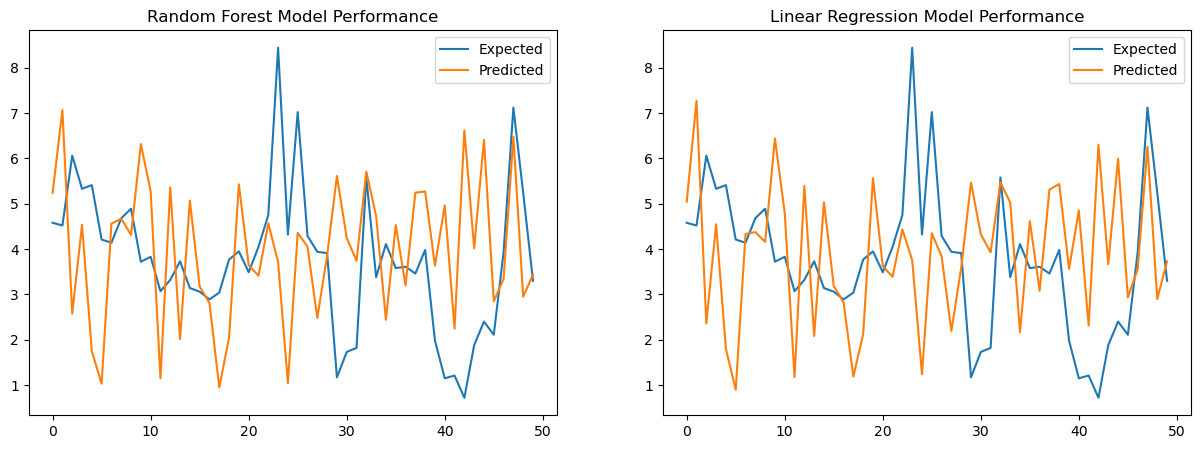

In [184]:
# plot expected vs predicted
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.title('Random Forest Model Performance')
plt.plot(y6[:50], label='Expected')
plt.plot(y_predf6[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.title('Linear Regression Model Performance')
plt.plot(y6[:50], label='Expected')
plt.plot(y_predr6[:50], label='Predicted')
plt.legend()
plt.show()

# 7. Predict Target "TKN"

In [186]:
#formulating the values to different variables to x7 and y7
#where x7 related to have feature values and y7 have target values
#droping the target variable TKN from the x7 variable
x7 = dataFrame.drop('TKN',axis=1)
y7 = dataFrame['TKN']

In [187]:
#splitted the dataset into 80:20 ratio where 80% dataset is splitted to training 
#and 20 % dataset is splitted to test dataset
x_train7, x_test7, y_train7, y_test7 = train_test_split(x7, y7, test_size=0.2, random_state=0)

In [188]:
#classify the model with 1000 no. of iteration for better performace of the model 
regressor7 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor7.fit(x_train7, y_train7)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [189]:
#liner regression model
linear_regress7 = LinearRegression()
#train the model with Linear Regression algorithm
linear_regress7.fit(x_train7,y_train7)

LinearRegression()

In [191]:
#apply the model to pridict the values from the test attributes values
y_predf7 = regressor7.predict(x_test7)
y_predr7 = linear_regress7.predict(x_test7)

In [192]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df7=pd.DataFrame({'Actual':y_test7, 'Predicted':y_predf7})
df7.head()

Random Forest Regression Results


,Actual,Predicted
5764,32.00,31.90156
6024,44.83,43.96976
3515,16.60,16.60515
888,28.50,28.60378
5626,13.00,12.89779


In [193]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df7=pd.DataFrame({'Actual':y_test7, 'Predicted':y_predr7})
df7.head()

Linear Regression Results


,Actual,Predicted
5764,32.00,31.834734
6024,44.83,43.502680
3515,16.60,16.576142
888,28.50,28.418934
5626,13.00,12.953516


In [196]:
#r2 sqaure error
print("Random Forest r2 score:",metrics.r2_score(y_test7,y_predf7))
print("Linear Regression r2 score:",metrics.r2_score(y_test7,y_predr7))

Random Forest r2 score: 0.9865474430801039
Linear Regression r2 score: 0.9781101538736934


In [197]:
# Calculate the absolute errors
errorsf7 = abs(y_predf7 - y_test7)
errorsr7 = abs(y_predr7- y_test7)

# Calculate mean absolute percentage error (MAPE)
mapef7 = 100 * (errorsf7 / y_test7)
maper7= 100 * (errorsr7 / y_test7)

# Calculate and display accuracy
accuracyf7 = 100 - np.mean(mapef7)
accuracyr7 = 100 - np.mean(maper7)
print('Random Forest Accuracy:', round(accuracyf7, 2), '%.')
print('Linear Regression Accuracy:', round(accuracyr7, 2), '%.')

Random Forest Accuracy: 98.91 %.
Linear Regression Accuracy: 99.22 %.


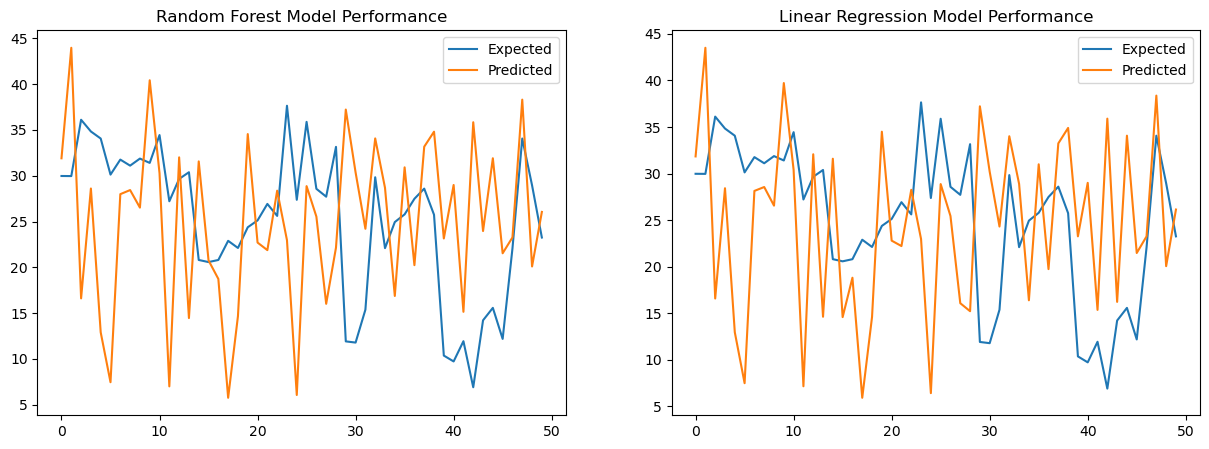

In [200]:
# plot expected vs predicted
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.title('Random Forest Model Performance')
plt.plot(y7[:50], label='Expected')
plt.plot(y_predf7[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.title('Linear Regression Model Performance')
plt.plot(y7[:50], label='Expected')
plt.plot(y_predr7[:50], label='Predicted')
plt.legend()
plt.show()

# 8. Predict Target "PRCP_NOOA"

In [201]:
#formulating the values to different variables to x8 and y8
#where x8 related to have feature values and y8 have target values
#droping the target variable Total Solids from the x8 variable
x8 = dataFrame.drop('PRCP_NOOA',axis=1)
y8 = dataFrame['PRCP_NOOA']

In [202]:
#splitted the dataset into 80:20 ratio where 80% dataset is splitted to training 
#and 20 % dataset is splitted to test dataset
x_train8, x_test8, y_train8, y_test8 = train_test_split(x8, y8, test_size=0.2, random_state=0)

In [203]:
#classify the model with 1000 no. of iteration for better performace of the model 
regressor8 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor8.fit(x_train8, y_train8)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [204]:
#liner regression model
linear_regress8 = LinearRegression()
#train the model with Linear Regression algorithm
linear_regress8.fit(x_train8,y_train8)

LinearRegression()

In [205]:
#apply the model to pridict the values from the test attributes values
y_predf8 = regressor8.predict(x_test8)
y_predr8 = linear_regress8.predict(x_test8)

In [206]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df8=pd.DataFrame({'Actual':y_test8, 'Predicted':y_predf8})
df8.head()

Random Forest Regression Results


,Actual,Predicted
5764,0.00,0.04293
6024,0.00,0.12302
3515,0.45,0.16095
888,0.02,0.03726
5626,0.42,0.06540


In [207]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df8=pd.DataFrame({'Actual':y_test8, 'Predicted':y_predr8})
df8.head()

Linear Regression Results


,Actual,Predicted
5764,0.00,0.092100
6024,0.00,-0.011441
3515,0.45,0.245370
888,0.02,0.084964
5626,0.42,0.291556


In [208]:
#r2 sqaure error
print("Random Forest r2 score:",metrics.r2_score(y_test8,y_predf8))
print("Linear Regression r2 score:",metrics.r2_score(y_test8,y_predr8))

Random Forest r2 score: 0.14425549763184375
Linear Regression r2 score: 0.10277606699150454


In [212]:
# Calculate the absolute errors
errorsf8 = abs(y_predf8 - y_test8)
errorsr8 = abs(y_predr8- y_test8)

# Calculate mean absolute percentage error (MAPE)
mapef8 = 100 * (errorsf8 / y_test8)
maper8= 100 * (errorsr8 / y_test8)

mapef8.replace([np.inf,-np.inf],np.nan,inplace=True)
mapef8.dropna(inplace=True)

maper8.replace([np.inf,-np.inf],np.nan,inplace=True)
maper8.dropna(inplace=True)

# Calculate and display accuracy
accuracyf8 = 300 - np.mean(mapef8)
accuracyr8 = 300 - np.mean(maper8)
print('Random Forest Accuracy:', round(accuracyf8, 2), '%.')
print('Linear Regression Accuracy:', round(accuracyr8, 2), '%.')

Random Forest Accuracy: 37.09 %.
Linear Regression Accuracy: 43.04 %.


In [216]:
result1 = [accuracyf1,accuracyf2,accuracyf3,accuracyf4,accuracyf5,accuracyf6,accuracyf7,accuracyf8]
result2 = [accuracyr1,accuracyr2,accuracyr3,accuracyr4,accuracyr5,accuracyr6,accuracyr7,accuracyr8]
features = ['Total Solids','SS','BOD5','NH3','Org-N','P-TOT','TKN','PRCP_NOOA']

In [217]:
print("Accuracies for Random Forest Regression")
for i in range(8):
    print(f"Accuracy for {features[i]} is {result1[i]}")

Accuracies for Random Forest Regression
Accuracy for Total Solids is 87.98680206538965
Accuracy for SS is 79.56284147237666
Accuracy for BOD5 is 83.5432790198649
Accuracy for NH3 is 98.04988478086658
Accuracy for Org-N is 90.3439468597237
Accuracy for P-TOT is 90.99535127913467
Accuracy for TKN is 98.9087610029369
Accuracy for PRCP_NOOA is 37.08869583091803


In [218]:
print("Accuracies for Linear Regression")
for i in range(8):
    print(f"Accuracy for {features[i]} is {result2[i]}")

Accuracies for Linear Regression
Accuracy for Total Solids is 87.35127242900813
Accuracy for SS is 73.84401813682814
Accuracy for BOD5 is 83.48796950518332
Accuracy for NH3 is 98.2352026408839
Accuracy for Org-N is 92.76732276917673
Accuracy for P-TOT is 90.6009424114605
Accuracy for TKN is 99.21746101109436
Accuracy for PRCP_NOOA is 43.04265496097429


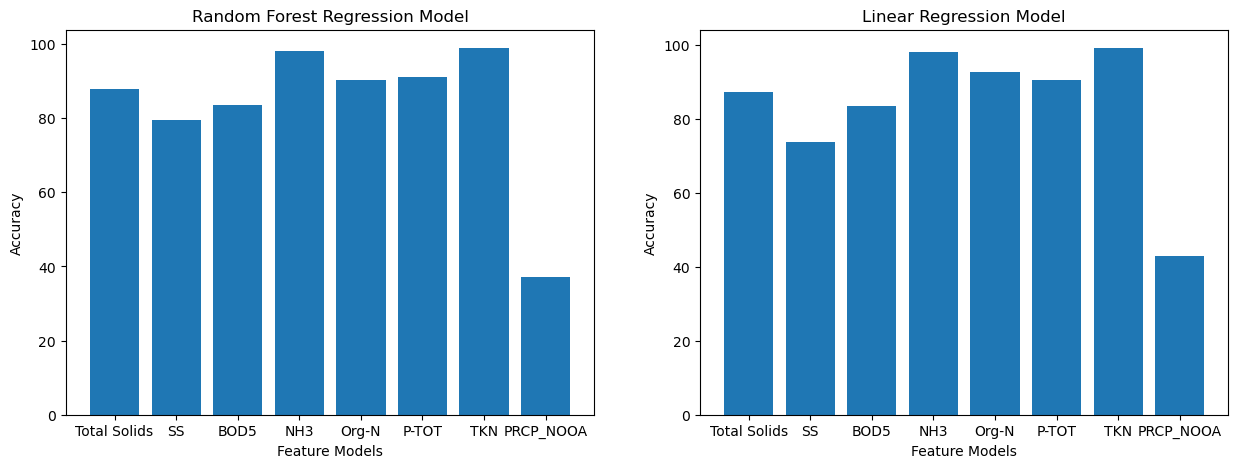

In [221]:
# plot histogram between the water characters for both models
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.title('Random Forest Regression Model')
plt.bar(features,result1)
plt.xlabel('Feature Models')
plt.ylabel('Accuracy')

ax = fig.add_subplot(1,2,2)
plt.title('Linear Regression Model')
plt.bar(features,result2)
plt.xlabel('Feature Models')
plt.ylabel('Accuracy')

plt.show()
